Resolved 105 packages in 5ms
Audited 101 packages in 17ms


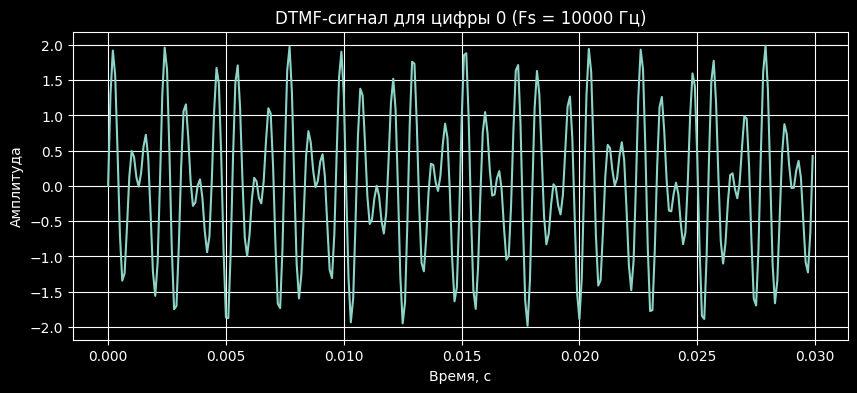

In [2]:
!uv sync
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# --- Таблица частот DTMF ---
dtmf = {
    '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
    '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
    '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
    '0': (941, 1336)
}

def generate_dtmf(digit, Fs, T=0.5):
    f1, f2 = dtmf[digit]
    t = np.linspace(0, T, int(Fs*T), endpoint=False)
    signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
    return t, signal

# ======== ВЫБОР ЧАСТОТЫ ========
Fs_choice = input("Частота дискретизации (10 или 2 кГц): ")

if Fs_choice == '10':
    Fs = 10_000
elif Fs_choice == '2':
    Fs = 2_000
else:
    raise ValueError("Введите 10 или 2")

# ======== РЕЖИМ ВВОДА ========
mode = input("Режим (1 — одна цифра, 2 — последовательность): ")

if mode == '1':
    digits = input("Введите одну цифру (0–9): ")
elif mode == '2':
    digits = input("Введите последовательность цифр: ")
else:
    raise ValueError("Введите 1 или 2")

# ======== ГЕНЕРАЦИЯ ========
T = 0.5
pause = np.zeros(int(0.1 * Fs))  # пауза между цифрами
signals = []

flag = False

for d in digits:
    t, s = generate_dtmf(d, Fs, T)
    signals.append(s)
    signals.append(pause)

    if not flag:
        flag = True
        plt.figure(figsize=(10, 4))
        plt.plot(t[:300], s[:300])
        plt.title(f"DTMF-сигнал для цифры {d} (Fs = {Fs} Гц)")
        plt.xlabel("Время, с")
        plt.ylabel("Амплитуда")
        plt.grid(True)
        plt.show()

full_signal = np.concatenate(signals)

# Нормализация (важно для sounddevice)
full_signal /= np.max(np.abs(full_signal))

# ======== ВОСПРОИЗВЕДЕНИЕ ========
sd.play(full_signal, Fs)
sd.wait()